# DIVE INTO CODE COURSE
## Exploratory data analysis Class assignment Credit information analysis
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

### \[Problem 1] Understanding the content of the competition
Read the competition's overview page and report what the "Home Credit Default Risk" competition looks like from the following perspectives.

#### 1. What kind of company is Home Credit?
Home Credit is a non-banking financial institution that provide services in leveraging consumer's buying power. The company will make sure the unbanked population could have a safe borrowing experience, and by using data as well as machine learning, they will predict their clients' repayment abilities.

#### 2. What is expected in this competition
Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data.

#### 3. What are the benefits companies can gain by predicting this?
When users on Kaggle compete, it would widen the potential of provided data and aid Home Credit in predicting what they desired for. So this will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### \[Problem 2] Understanding the overview of data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv('home_credit/application_train.csv')

In [3]:
# Check the number of columns and rows of this dataset
print("application_train dataset -- rows: {}, columns: {}".format(df.shape[0], df.shape[1]))

application_train dataset -- rows: 307511, columns: 122


In [4]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Most of datatypes are number

In [7]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
# Check missing values
def check_missing(df):
    total_missing = df.isna().sum().sort_values(ascending=False)
    missing_ratio = (df.isna().sum()/df.isna().count()*100).sort_values(ascending=False)
    
    missing_df = pd.concat([total_missing, missing_ratio], axis=1, keys=['Total', 'Ratio'])

    return missing_df

In [9]:
miss_value = check_missing(df)
miss_value.head(10)

Total      Ratio
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953

<AxesSubplot:>

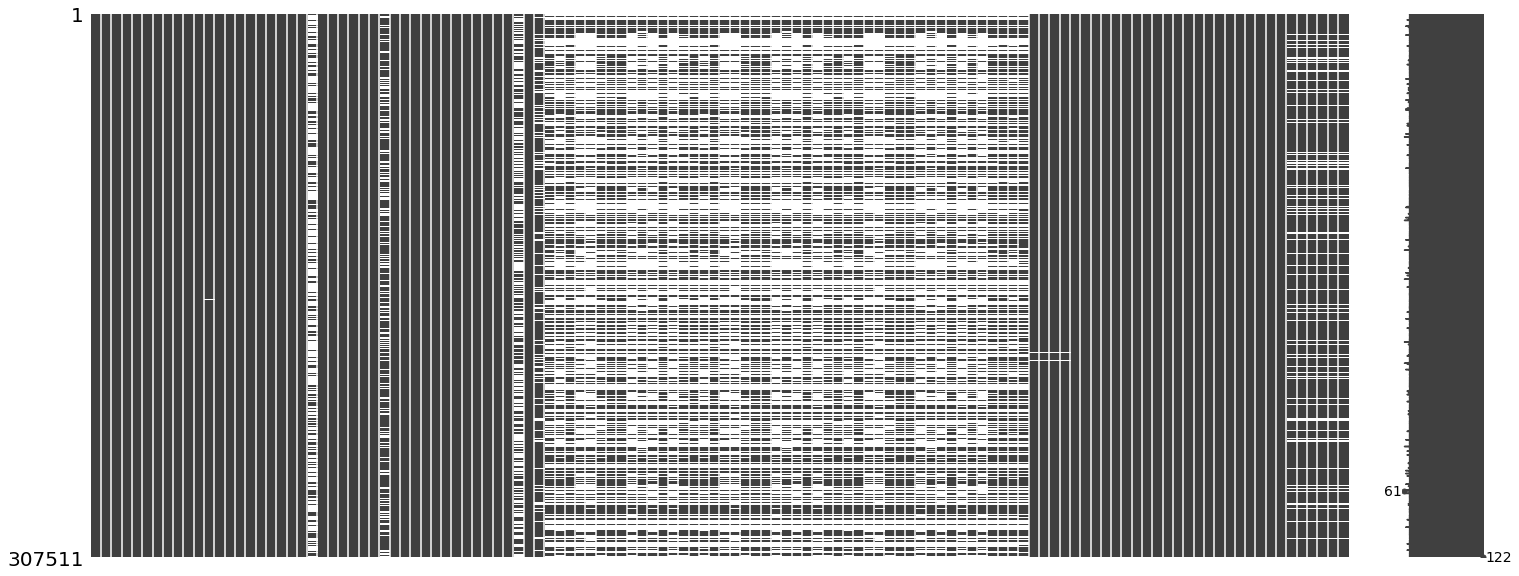

In [10]:
import missingno as msno

msno.matrix(df)

### \[Problem 3] Defining issues

From the description csv, the target variable is described as: "The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0."

In summary, TARGET = 0 means loan is repayed, TARGET = 1 means loan is not repayed

Here I will set some questions for myself:

1. What is the distribution in type of target (0/1)?
2. What is the distribution in the gender of target (M/F)
3. Does the clients have a car?
4. Does the clients own real estates?
5. What is the family status of the client?
6. How many children does the applicants have?
7. How many family members does the applicants have?
8. Income type of clients?
9. What type of occupation does the clients have?
10. Credit amount of the loans?
11. Are the clients employed? If yes, for how many days?



### \[Problem 4] Data exploration
### 1. What is the distribution in type of target (0/1)?

In [11]:
target_type = df["TARGET"].value_counts()
target_type_df = pd.DataFrame({
                'Type': ['Paid', 'Late payment'],
                'Amount': target_type.values
                })

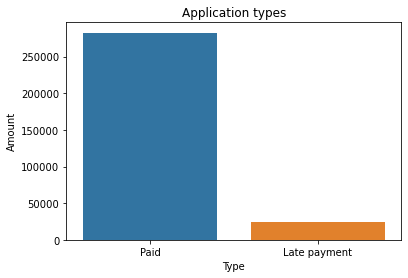

In [12]:
plt.title('Application types')
sns.barplot(x="Type", y="Amount", data=target_type_df)
plt.show()

It can be seen that the number of people who have paid for the loans is approximately 10 times greater than those who have payment diffficulties.

####  2. What is the distribution in the gender of target (M/F)

In [13]:
gender_type = df["CODE_GENDER"].value_counts()
gender_type_df = pd.DataFrame({
                'Gender': gender_type.index,
                'Number of applicants': gender_type.values
                })

In [14]:
gender_type_df

Gender  Number of applicants
0      F                202448
1      M                105059
2    XNA                     4

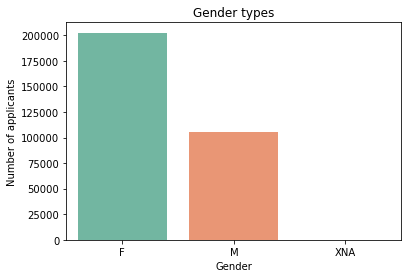

In [15]:
plt.title('Gender types')
sns.set_palette("Set2")
sns.barplot(x="Gender", y="Number of applicants", data=gender_type_df)
plt.show()

In [16]:
type_0_df = df[df.TARGET == 0]
type_1_df = df[df.TARGET == 1]

gender_type_0 = type_0_df["CODE_GENDER"].value_counts()
gender_type_0_df = pd.DataFrame({
                'Gender': gender_type_0.index,
                'Number of applicants': gender_type_0.values
                })

gender_type_1 = type_1_df["CODE_GENDER"].value_counts()
gender_type_1_df = pd.DataFrame({
                'Gender': gender_type_1.index,
                'Number of applicants': gender_type_1.values
                })

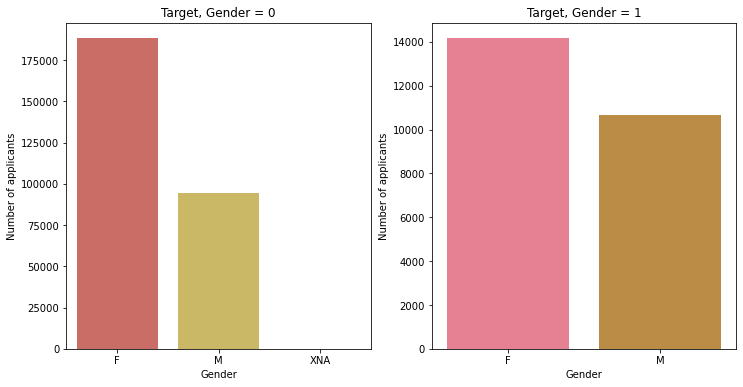

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.set_palette("hls", 8)
sns.barplot(ax=axes[0], x="Gender", y="Number of applicants", data=gender_type_0_df)
axes[0].set_title("Target, Gender = 0")

sns.set_palette("husl", 8)
sns.barplot(ax=axes[1], x="Gender", y="Number of applicants", data=gender_type_1_df)
axes[1].set_title("Target, Gender = 1")
plt.show()

In conclusion, woman have the majority of the loans application which is nearly double as the men. There were 202448 women who applied for the loans in contrast to the figure for men which is 105059.

In [18]:
male_number = len(df[df.CODE_GENDER == "M"])
female_number = len(df[df.CODE_GENDER == "F"])

In [19]:
female_0 = len(df[(df.CODE_GENDER == "F") & (df.TARGET == 0)])
male_0 = len(df[(df.CODE_GENDER == "M") & (df.TARGET == 0)])
female_1 = len(df[(df.CODE_GENDER == "F") & (df.TARGET == 1)])
male_1 = len(df[(df.CODE_GENDER == "M") & (df.TARGET == 1)])

In [20]:
ratio_type_0_df = pd.DataFrame({
                'Gender': ['F', 'M'],
                'Ratio': [female_0/female_number*100, male_0/male_number*100]
                })

ratio_type_1_df = pd.DataFrame({
                'Gender': ['F', 'M'],
                'Ratio': [female_1/female_number*100, male_1/male_number*100]
                })

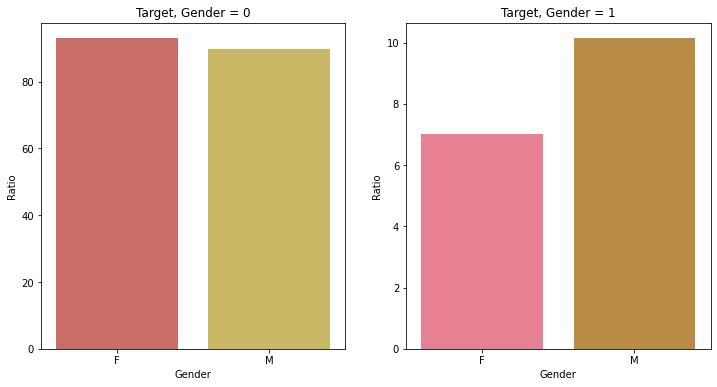

In [21]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.set_palette("hls", 8)
sns.barplot(ax=axes[0], x="Gender", y="Ratio", data=ratio_type_0_df)
axes[0].set_title("Target, Gender = 0")

sns.set_palette("husl", 8)
sns.barplot(ax=axes[1], x="Gender", y="Ratio", data=ratio_type_1_df)
axes[1].set_title("Target, Gender = 1")
plt.show()

However, we we look at the bar graph of Targer, Gender = 1 above, we can see that a larger percentage (about 10%) of men had difficulties in paying the loan or paying within time as compared to women applicants (about 7%).

### 3. Does the clients have a car?

In [22]:
car_type = df["FLAG_OWN_CAR"].value_counts()
car_type

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

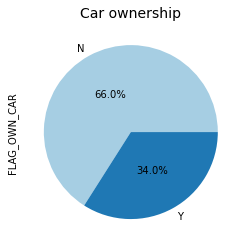

In [23]:
sns.set_palette("Paired")
car_type.plot.pie(autopct="%.1f%%", pctdistance=0.5)
plt.title("Car ownership in total", fontsize=14);
plt.show()

We will specifically explore the information of both type of applicants.

In [28]:
car_type_0 = type_0_df["FLAG_OWN_CAR"].value_counts()
car_type_0

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

In [30]:
car_type_1 = type_1_df["FLAG_OWN_CAR"].value_counts()
car_type_1

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

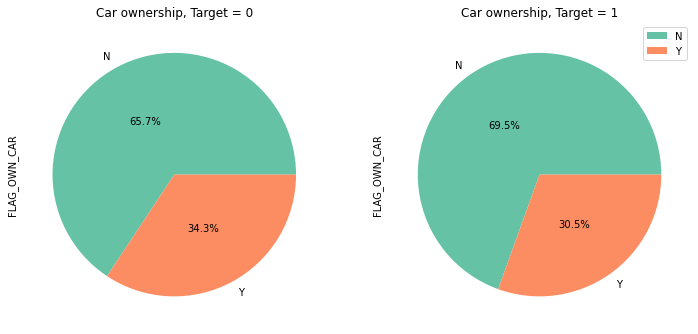

In [35]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.set_palette("Set2")
car_type_0.plot.pie(ax=axes[0], autopct="%.1f%%", pctdistance=0.5)
axes[0].set_title("Car ownership, Target = 0")

car_type_1.plot.pie(ax=axes[1], autopct="%.1f%%", pctdistance=0.5)
axes[1].set_title("Car ownership, Target = 1")
plt.legend()
plt.show()

It can be see that from both type of applicants, the number of car ownership is quite small compared to those who do not have car.

### 4. Does the clients own real estates?

Since we are going to reuse the coding flow like the question 3, I managed to create a function to print out the graph.

In [104]:
def plot_chart(dataframe, feature, graph_title, mode, axis):
    """
    Function provides graph plotting function in both mode: bar and pie chart

    Arguments:
    dataframe:
        The dataframe of the application_train.csv file

    feature: (string)
        The feature that will be used to query the desired information from original dataframe
    
    graph_title: (string)
        The title for graphs

    mode: (string)
        The mode we want to use. If mode = 'pie', pie chart will be provided. If mode = 'bar', barplot will be provided.
    
    axis: (char)
        The mode of display. 'h' for horizital. 'v' for vertical.
    """

    general_value = df[feature].value_counts()

    type_0_df = dataframe[dataframe.TARGET == 0]
    type_1_df = dataframe[dataframe.TARGET == 1]

    type_0_value = type_0_df[str(feature)].value_counts()
    type_1_value = type_1_df[str(feature)].value_counts()


    if mode == "pie":
        if axis == "h":
            fig, axes = plt.subplots(1,3, figsize=(16,6))
        elif axis == "v":
            fig, axes = plt.subplots(3,1, figsize=(12,24))

        sns.set_palette("Set2")

        general_value.plot.pie(ax=axes[0], autopct="%.1f%%", pctdistance=0.5)
        axes[0].set_title("{} ownership in total".format(graph_title))

        type_0_value.plot.pie(ax=axes[1], autopct="%.1f%%", pctdistance=0.5)
        axes[1].set_title("{} ownership, Target = 0".format(graph_title))

        type_1_value.plot.pie(ax=axes[2], autopct="%.1f%%", pctdistance=0.5)
        axes[2].set_title("{} ownership, Target = 1".format(graph_title))
        plt.legend()
        plt.show()
    
    elif mode == "bar":
        if axis == "h":
            fig, axes = plt.subplots(1,3, figsize=(16,6))
        elif axis == "v":
            fig, axes = plt.subplots(3,1, figsize=(12,24))

        general_value_df = pd.DataFrame({
                'Feature': general_value.index,
                'Number': general_value.values
                })

        type_0_value_df = pd.DataFrame({
                'Feature': type_0_value.index,
                'Number': type_0_value.values
                })

        type_1_value_df = pd.DataFrame({
                'Feature': type_1_value.index,
                'Number': type_1_value.values
                })

        sns.set_palette("Set2")

        chart = sns.barplot(ax=axes[0], x="Feature", y="Number", data=general_value_df)
        axes[0].set_title("{} ownership in total".format(graph_title))
        chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

        chart = sns.barplot(ax=axes[1], x="Feature", y="Number", data=type_0_value_df)
        axes[1].set_title("{} ownership, Target = 0".format(graph_title))
        chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

        chart = sns.barplot(ax=axes[2], x="Feature", y="Number", data=type_1_value_df)
        axes[2].set_title("{} ownership, Target = 1".format(graph_title))
        chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
        
        plt.legend()
        plt.show()
    
    return

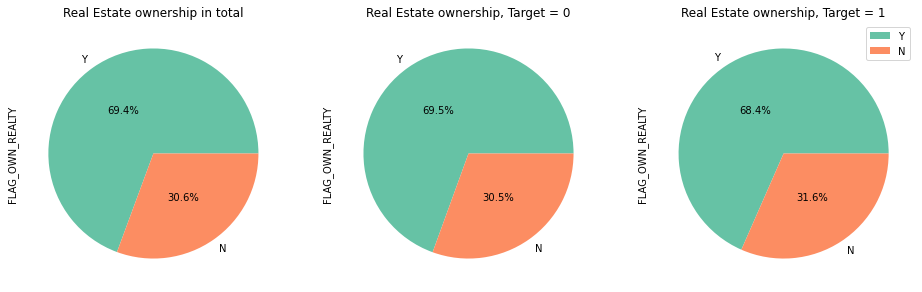

In [105]:
plot_chart(df, 'FLAG_OWN_REALTY', "Real Estate", "pie", "h")

In contrast to the car ownership question, in both type of people, a majority of applicants own real estate such at house or flat. In my assumption, maybe some of them need to borrow money to pay (or buy) their houses or apartments.

### 5. What is the family status of the client?

No handles with labels found to put in legend.


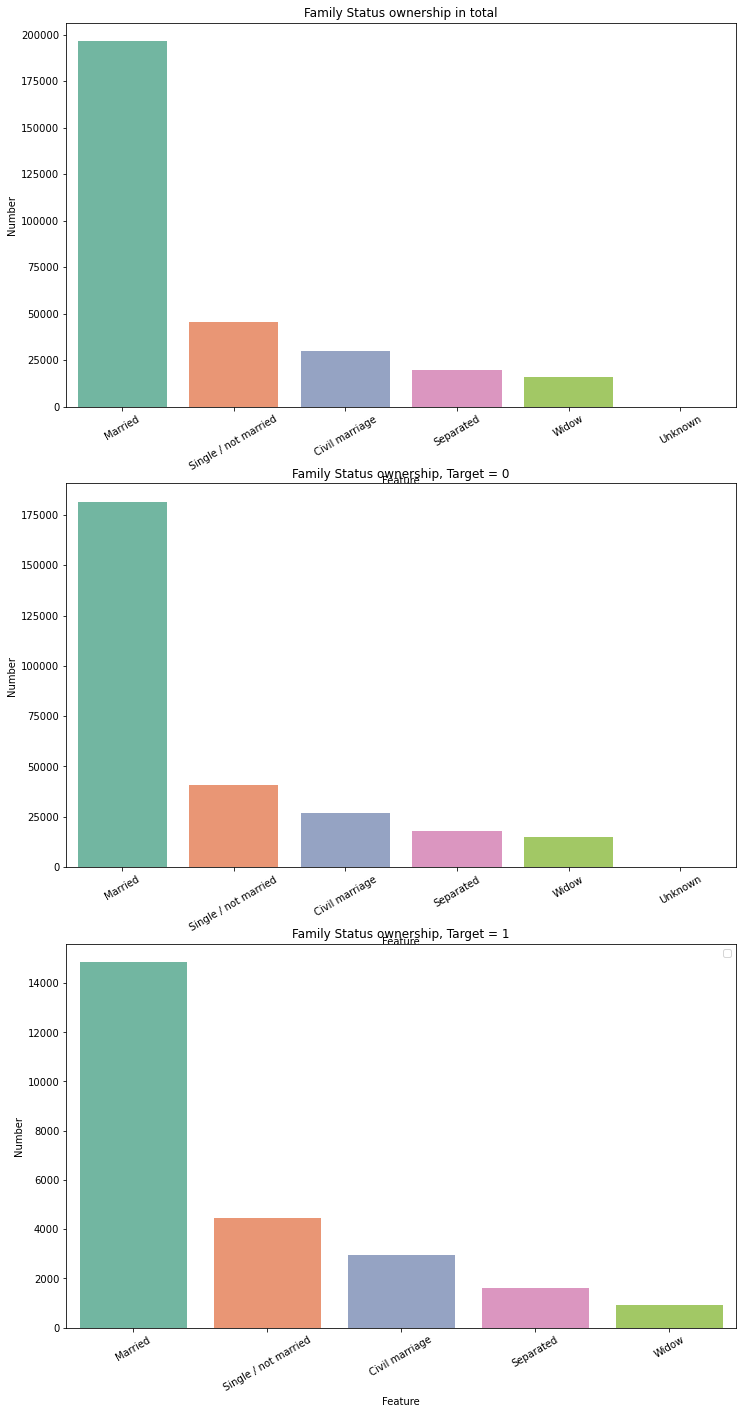

In [106]:
plot_chart(df, 'NAME_FAMILY_STATUS', "Family Status", "bar", "v")

So in general, most of the applicants are married (without the recognition of government and related institution, which different from civil marriage), followed by the number of people who are single.

### 6. How many family members does the applicants have?

No handles with labels found to put in legend.


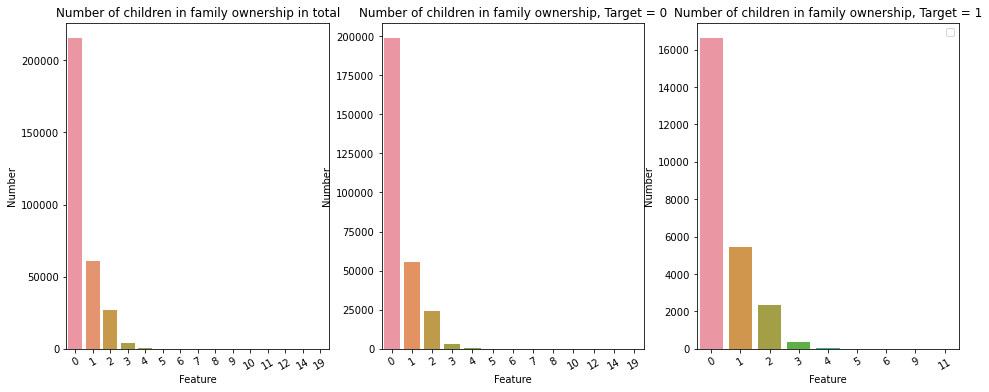

In [107]:
plot_chart(df, 'CNT_CHILDREN', "Number of children in family", "bar", "h")

Surprisingly, despite of the large proportion of married family, there are so many applicants do not have children. The second rank figure is one child, then two and lastly, 3-4 children.

### 7. How many family members does the applicants have?

No handles with labels found to put in legend.


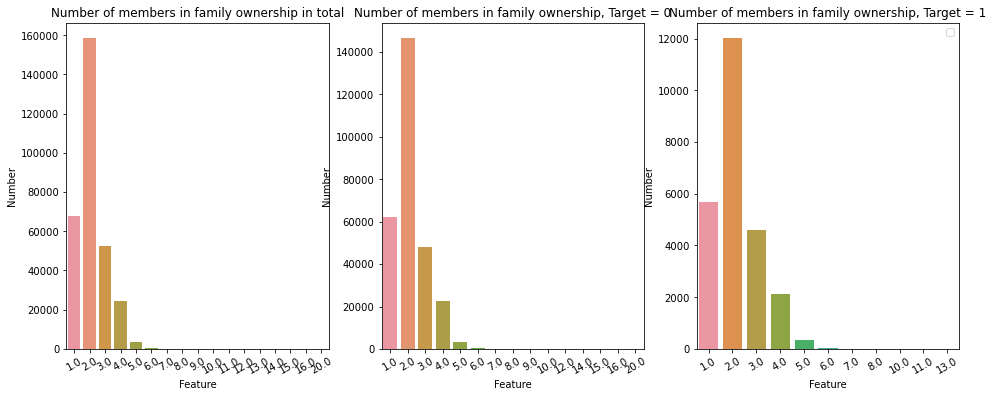

In [108]:
plot_chart(df, 'CNT_FAM_MEMBERS', "Number of members in family", "bar", "h")

A majority of family has two members, followd by one member (perhaps they are the single ones), then 3 members and 4-5 members.

### 8. Income type of clients?

No handles with labels found to put in legend.


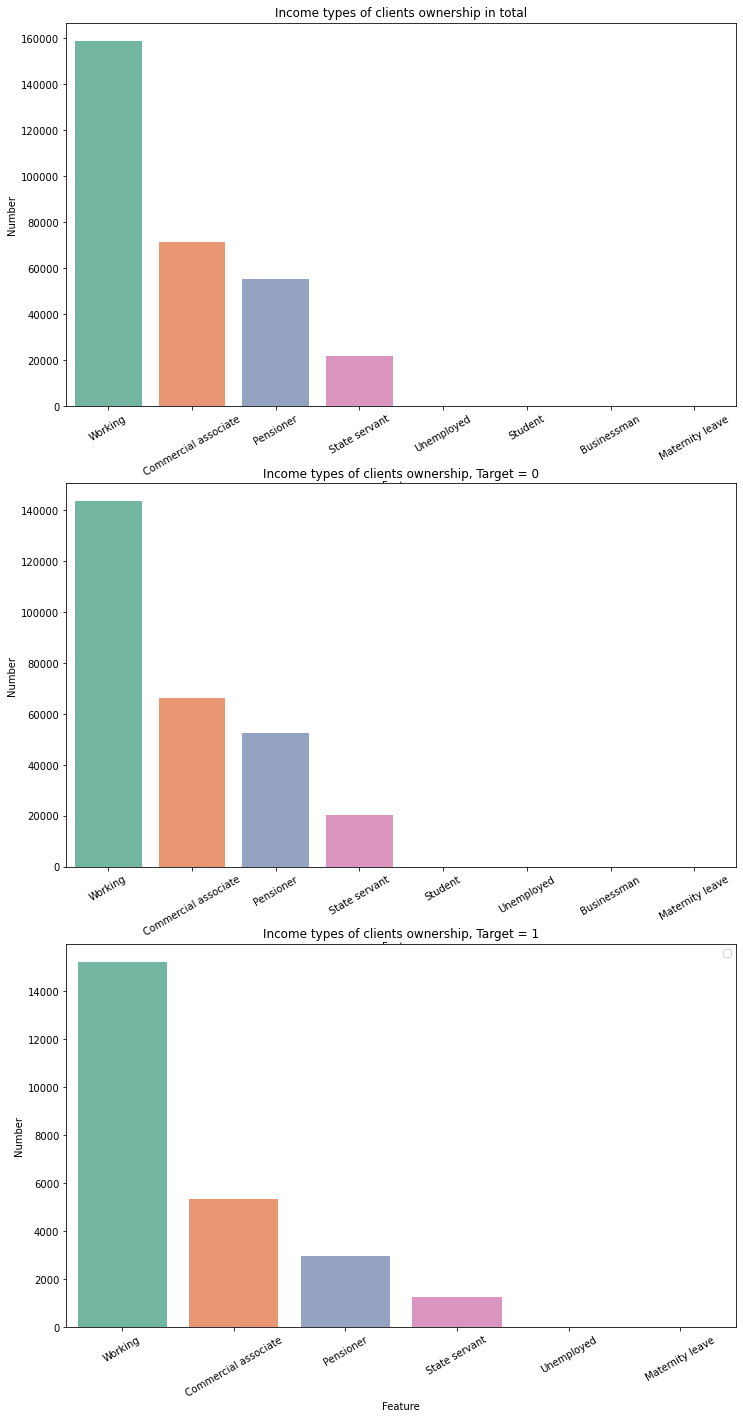

In [109]:
plot_chart(df, 'NAME_INCOME_TYPE', "Income types of clients", "bar", "v")

From the graph, especially in the first one (general graph), there is a total of 8 categories. The top ones are: Working, Commercial associate and Pensioner

### 9. What type of occupation does the clients have?

No handles with labels found to put in legend.


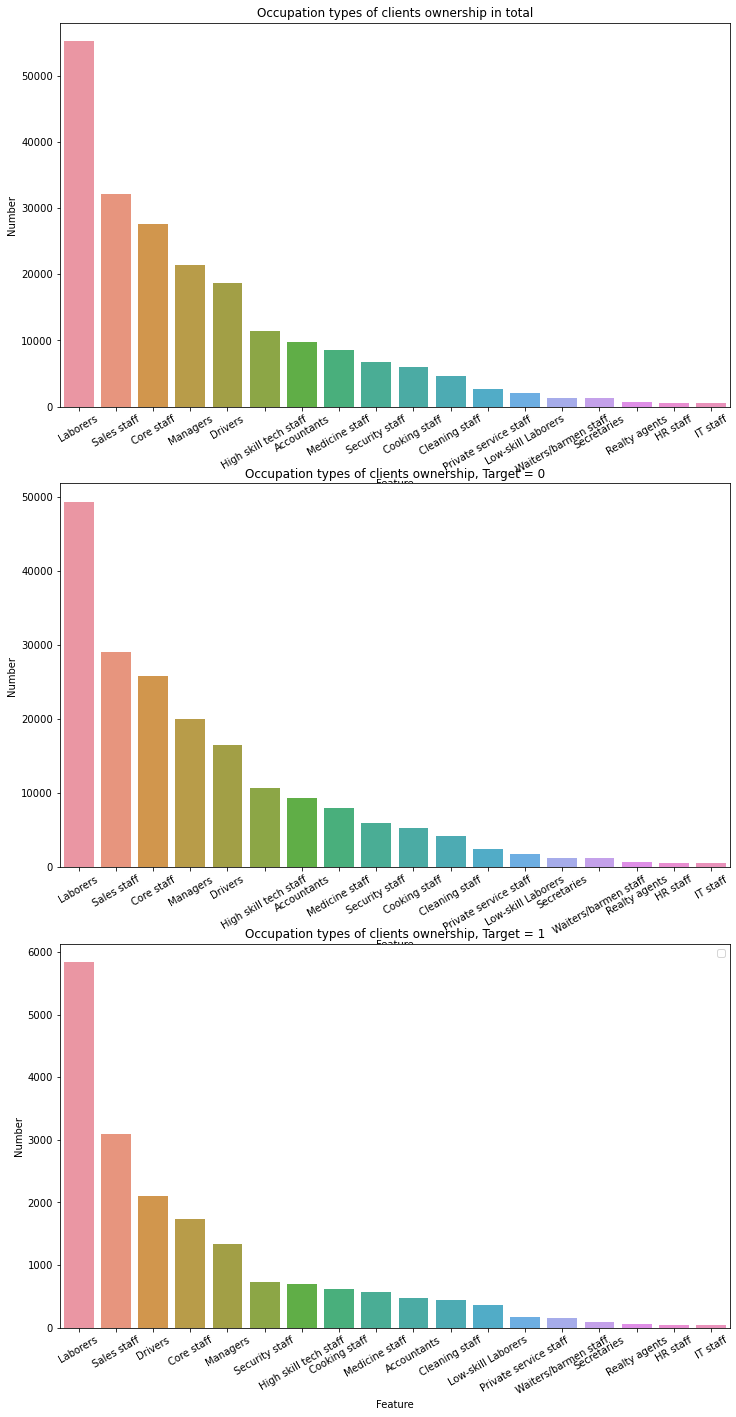

In [110]:
plot_chart(df, 'OCCUPATION_TYPE', "Occupation types of clients", "bar", "v")

In general, laborers are the most popular job of applicants, followed by sales staff and core staff. Specifically, in type 1, the number of drivers is larger than core staffs.

### 10. Credit amount of the loans?

C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of credit amoun of loans')

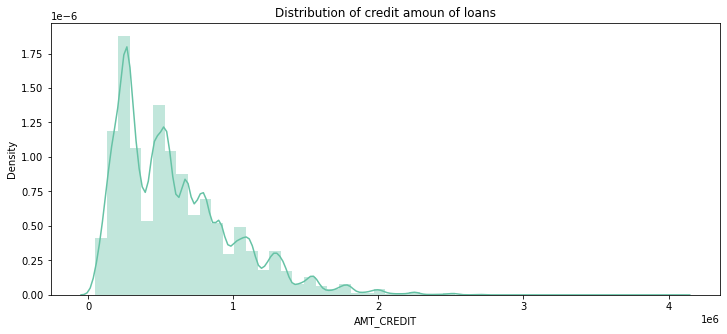

In [115]:
plt.figure(figsize=(12,5))
ax = sns.distplot(df['AMT_CREDIT'])
ax.set_title("Distribution of credit amoun of loans")

### 11. Are the clients employed? If yes, for how many days?

C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of credit amoun of loans')

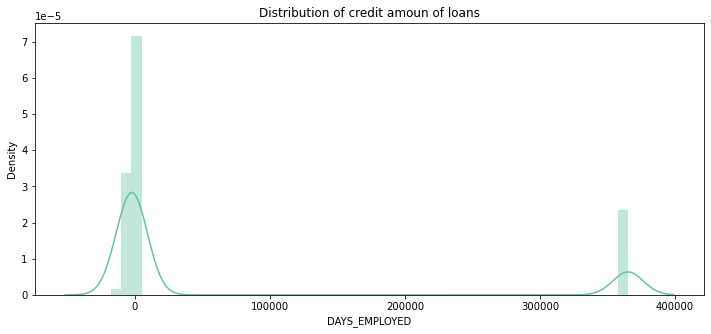

In [153]:
plt.figure(figsize=(12,5))
ax = sns.distplot(df['DAYS_EMPLOYED'])
plt.title("Distribution of credit amoun of loans")

There are some errors in the graph (more than 300k days, wow, that must equal 100 years), thus, we will eliminate them for a better plotting process.

C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of credit amoun of loans')

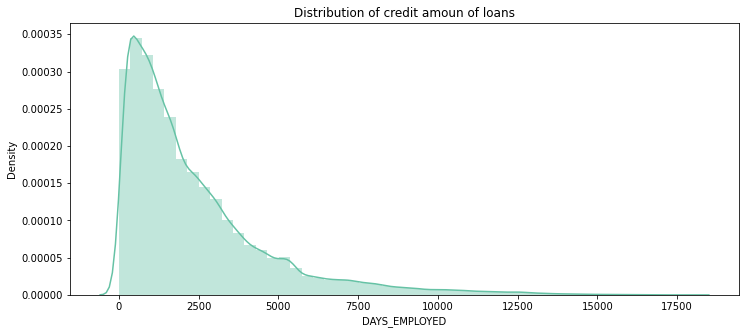

In [152]:
plt.figure(figsize=(12,5))
day_employed = np.abs(df[df.DAYS_EMPLOYED < 14600]['DAYS_EMPLOYED'])
sns.distplot(day_employed) # 14600 days equal ~ 40 years
plt.title("Distribution of credit amoun of loans")

In [151]:
from scipy.stats import skew, kurtosis
print("Skewness value: {}".format(skew(day_employed, bias=False)))
print("Kurtosis value: {}".format(kurtosis(day_employed, bias=False)))

Skewness value: 1.968315531070477
Kurtosis value: 4.752651548074539


C:\Users\ferbd\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution after log transformation')

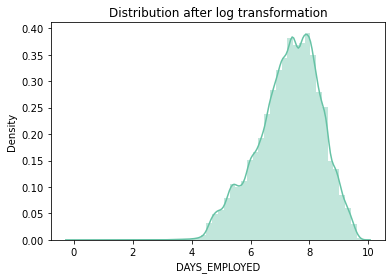

In [162]:
day_employed_log = np.log(day_employed[day_employed.values > 0]) # Because there are 0s, log transformation cannot performed on them
sns.distplot(day_employed_log)
plt.title("Distribution after log transformation")

In [163]:
print("Skewness value: {}".format(skew(day_employed_log, bias=False)))
print("Kurtosis value: {}".format(kurtosis(day_employed_log, bias=False)))

Skewness value: -0.4416409573252221
Kurtosis value: -0.10989617758394976
